In [161]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px
import plotly.figure_factory as ff

!pip install seaborn
import seaborn as sns
from scipy.stats import norm
import warnings
sns.set(rc={'figure.figsize':(11.7,8.27)})
warnings.filterwarnings("ignore")

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [162]:
df = pd.read_csv('data.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [164]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [165]:
df[['Wage']].head(10)

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
5,€340K
6,€420K
7,€455K
8,€380K
9,€94K


# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [166]:
fig = px.histogram(df, x="Age", title='Распределение возрастов')
#fig.show(renderer='iframe')

![](./iframe_figures/newplot.png "Title")

In [167]:
group_labels = ['Возрасты футболистов']
fig = ff.create_distplot([df['Age']], group_labels, curve_type='normal', colors=['green'])
# fig.update_layout(title_text='Распределение возрастов')
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(1).png "Title")

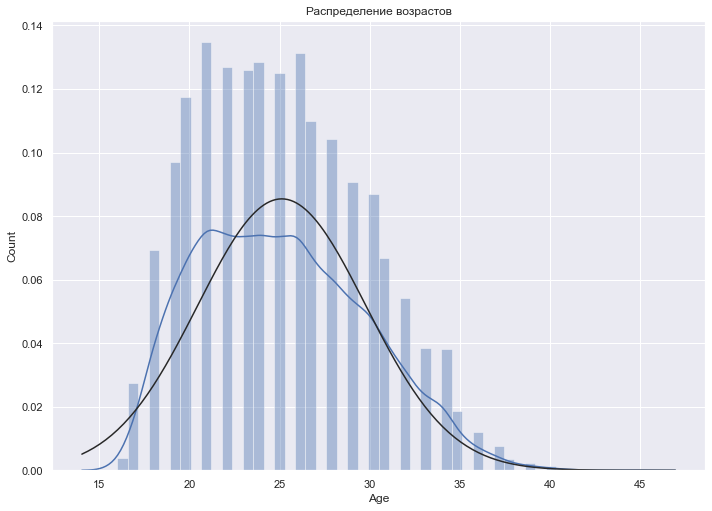

In [168]:
sns.distplot(df["Age"], fit=norm)
plt.title("Распределение возрастов")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Распределение возрастов отражено на трех гистограммах, построенных c помощью библиотек matplotlib.pyplot, seaborn и plotly(модули figure_factory и express). В plotly получились интерактивные графики, удобно смотреть количество наблюдений в каждом столбце. Все графики информативны, информация представлена наглядно. Так же удобно добавлять на график кривую нормального распределения.



---
Проанализировав полученную информацию, можно сделать вывод, что распределение возрастов футболистов очень близко к нормальному. Больше всего футболистов в возрасте 26 лет(1310 человек).


---

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

In [169]:
df["Preferred Foot"].head()

0     Left
1    Right
2    Right
3    Right
4    Right
Name: Preferred Foot, dtype: object

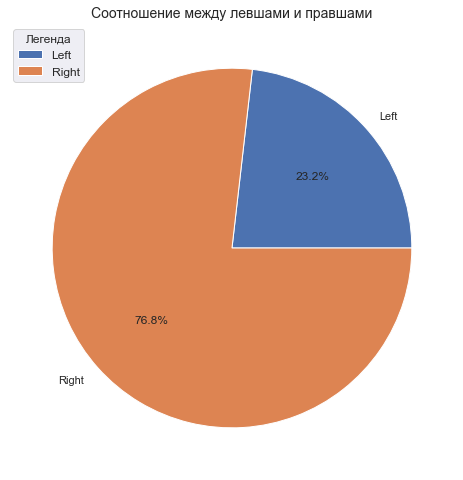

In [170]:
df_foot = df.groupby("Preferred Foot").size()
plt.pie(
    df_foot,
    labels = df_foot.index, 
    autopct='%.1f%%',
    );
plt.title("Соотношение между левшами и правшами", fontdict = {'fontsize' : 14})
plt.legend(df_foot.index, 
           loc='best', 
           fontsize = 12,
           title = "Легенда"
          )
plt.show()

---

По построенной круговой диаграмме можно сделать вывод о том, что среди футболистов больше всего правшей, причем их примерно в 3 раза больше чем левшей.


---

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

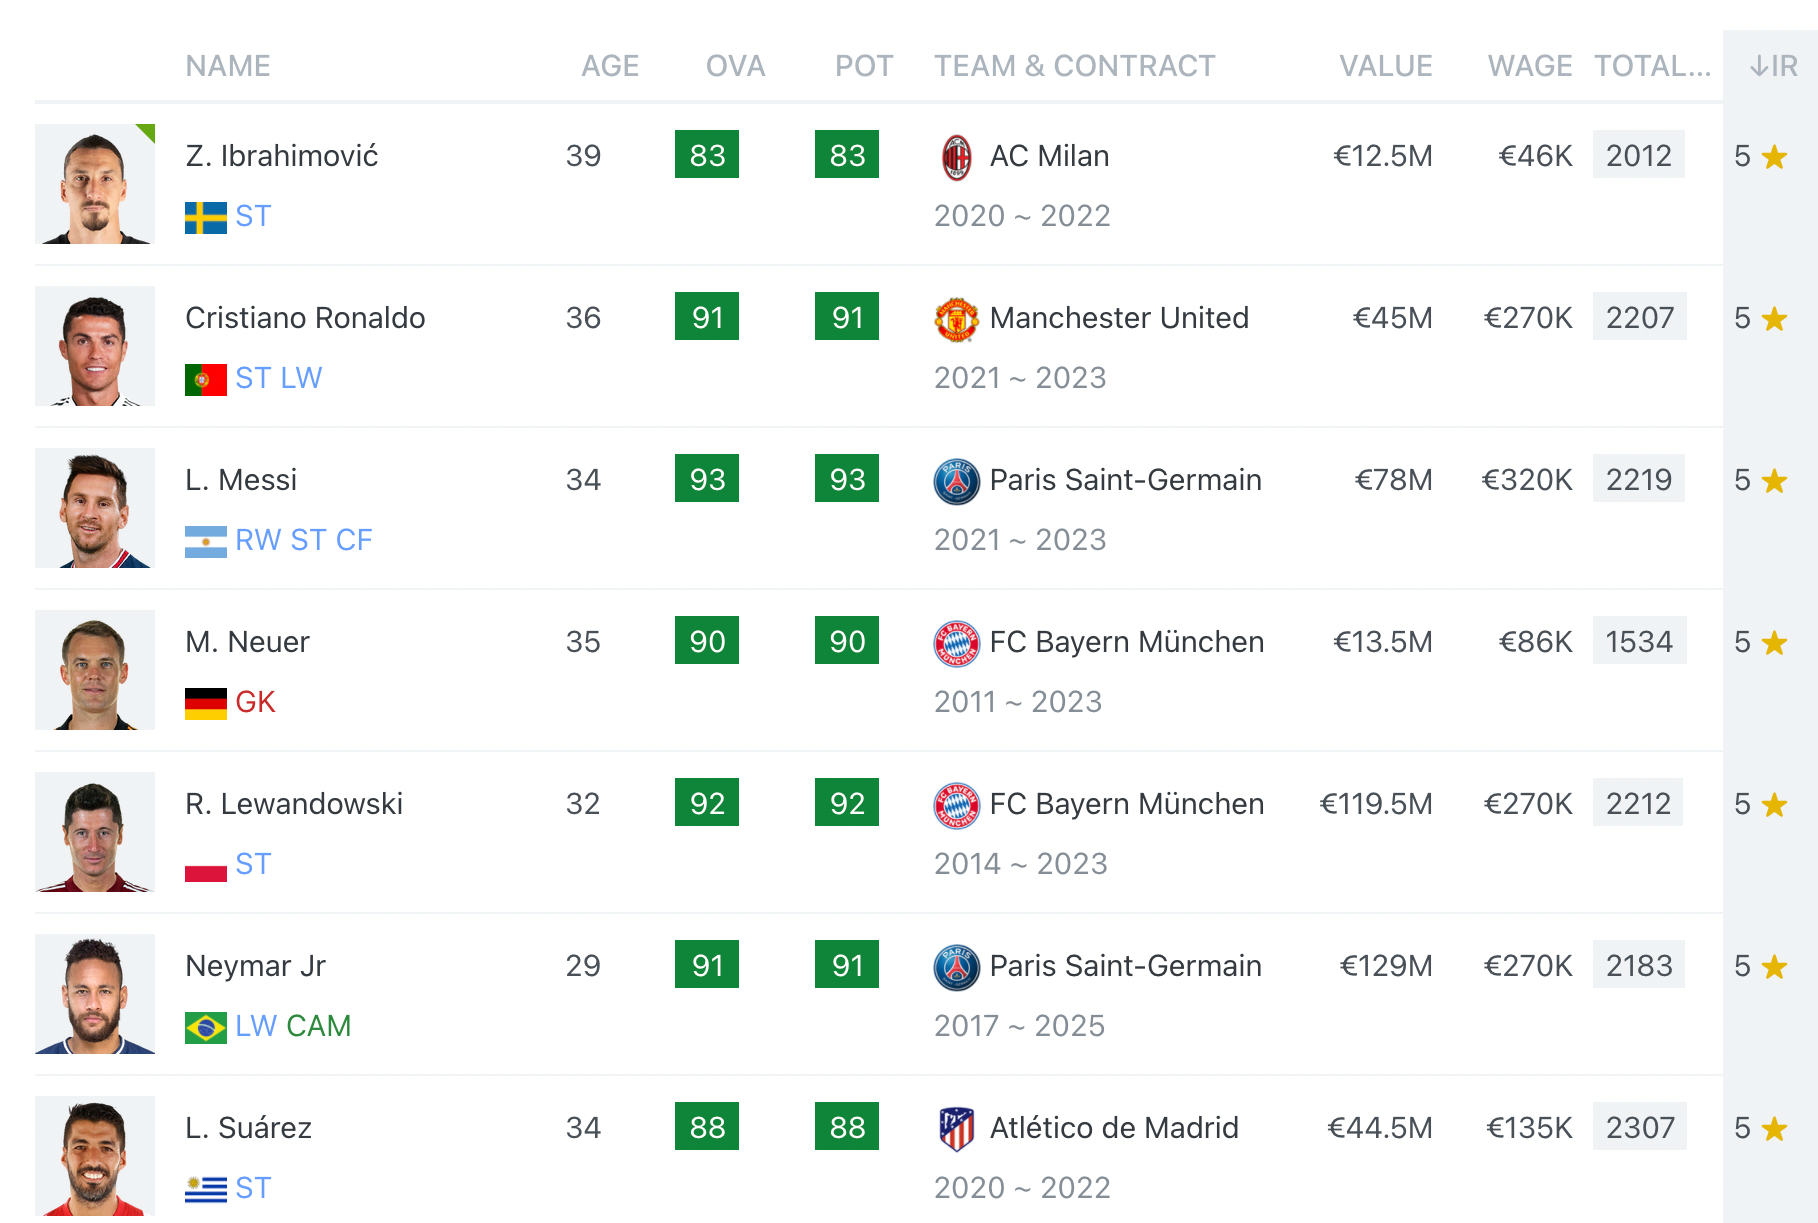

In [171]:
fig = px.histogram(df, x="International Reputation", title='Визуализация рейтинга')
#fig.show(renderer='iframe')

![](./iframe_figures/newplot(2).png)



---
С помощью гистограммы можно сделать вывод, что больше всего футболистов с рейтингом 1 - 16532 человека, с рейтингом 2 -1261, с 3 - 309, с рейтингом 4 - 51, а с наивысшем рейтингов единицы футболистов. 

---


In [172]:
df_int_rate = df[["International Reputation", "Nationality", "Club"]]
display("Размер вспомогательного датасета", df_int_rate.shape)
df_int_rate["Nationality"] = pd.factorize(df_int_rate["Nationality"])[0]
df_int_rate["Club"] = pd.factorize(df_int_rate["Club"])[0]
df_int_rate = df_int_rate.dropna(subset=["Nationality", "International Reputation", "Club"])
display("Размер датасета после удаления строк с Nan", df_int_rate.shape)

'Размер вспомогательного датасета'

(18207, 3)

'Размер датасета после удаления строк с Nan'

(18159, 3)

Создадали отдельный датафрейм df_int_rate с переменными International Reputation, Nationality, Club. Перекодировали категориальные переменные Nationality, Club в метрические. Удалили наблюдения с пропусками значений в интересующих нас столбцах. Заметим, что было удалено только 1 значение, то есть потеряна очень незначительная часть данных.

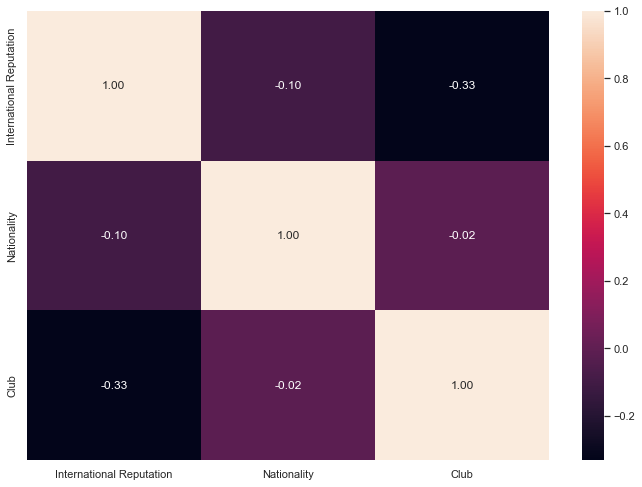

In [173]:
sns.heatmap(df_int_rate.corr(), annot=True, fmt=".2f");

In [174]:
display("Корреляция между национальностью футболиста и его рейтингом")
display(df_int_rate["Nationality"].corr(df_int_rate["International Reputation"]))

'Корреляция между национальностью футболиста и его рейтингом'

-0.10044824928990861

In [175]:
display("Корреляция между клубом футболиста и его рейтингом")
df_int_rate["Club"].corr(df_int_rate["International Reputation"])

'Корреляция между клубом футболиста и его рейтингом'

-0.3315051557019282



---

Значение корреляции между клубом и рейтингом сотавила -0.39, а между национальностью и рейтингом -0,09. Можно утверждать, что зависимости между рейтингом и национальностью нет, а между рейтингом и клубом наблюдается слабая зависимость. Это подтверждают визуализированные с помощью графика heatmap библиотеки seaborn данные. 

---




Чтобы убедиться в полученных данных, построим диаграмму рассеяния среднего рейтинга в зависимости от клуба.


In [176]:
df1 = df.groupby("Club", as_index=False).aggregate({"International Reputation":"mean"}).sort_values(by="International Reputation")
fig = px.scatter(df1, x="International Reputation", y="Club")
# fig.update_layout(title_text='Средний рейтинг в зависимости от клуба')
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(8).png "Title")



---

Диаграмма демонстрирует то, что в таких клубах как FC Barcelona, Borussia Moncheggladbach, Atlanta, Aston Villa, Montreal Impact и некоторых других средний рейтинг футболистов самы высокий.

---



9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)


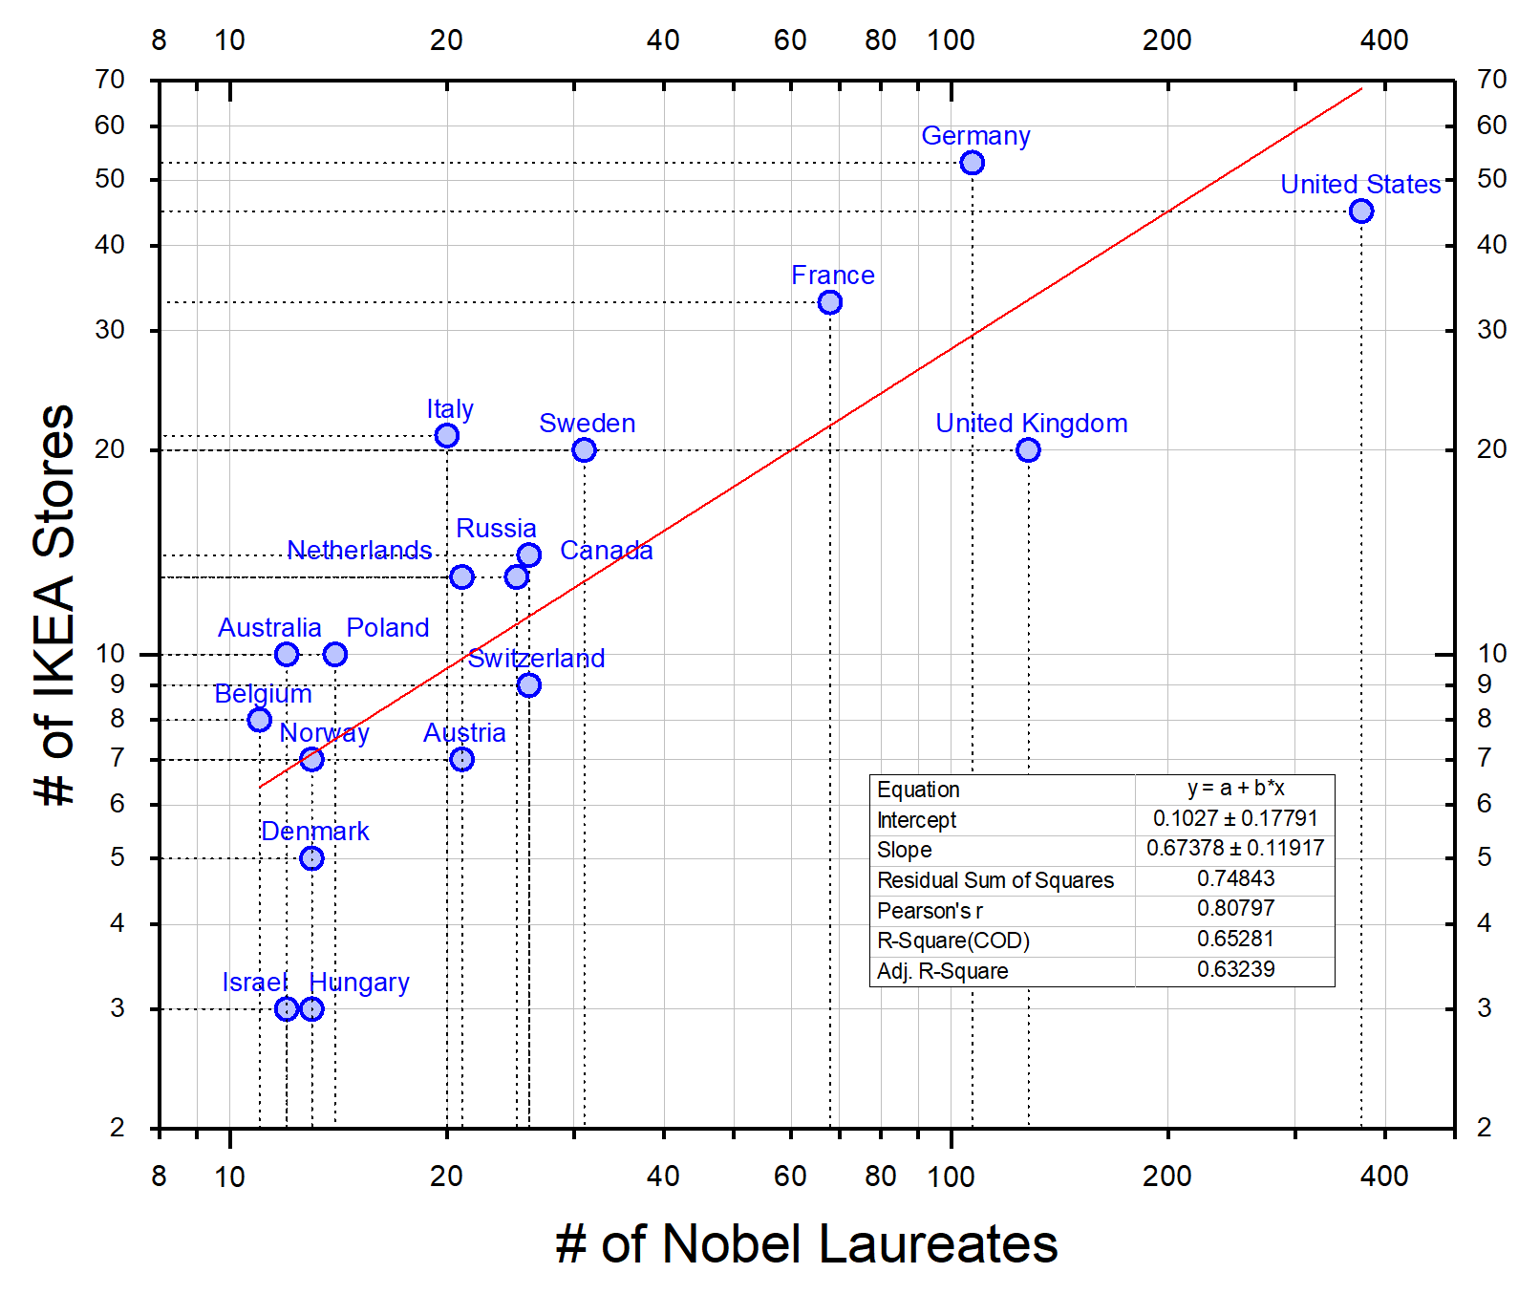

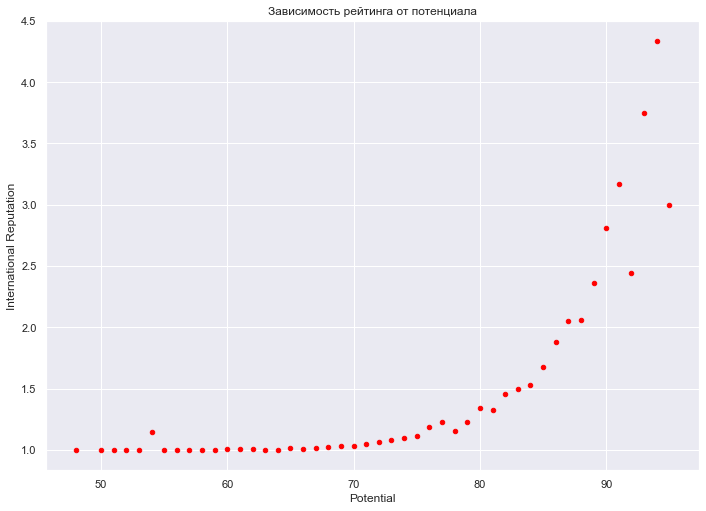

In [177]:
df1 = df.groupby("Potential", as_index=False).aggregate({"International Reputation":"mean"})
df1.plot.scatter(x="Potential", y="International Reputation", color = "red");
plt.title("Зависимость рейтинга от потенциала");


Диаграмма рассеяния построена на средних значених рейтинга.


---

Между потенциалом и рейтингом есть зависимость(нелинейная). За исключением нескольних выбросов, зависимость близка в экспоненциальной. 

---



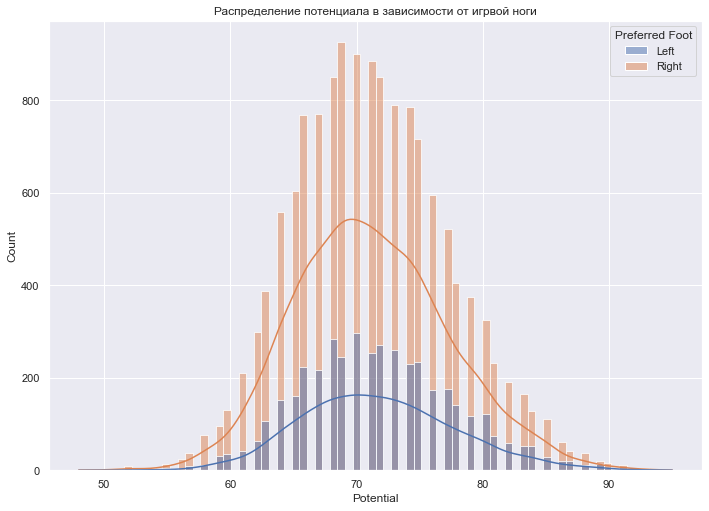

In [178]:
sns.histplot(data = df, x = df["Potential"], hue="Preferred Foot", kde=True)
plt.title("Распределение потенциала в зависимости от игрвой ноги")
plt.xlabel("Potential")
plt.ylabel("Count")
plt.show()



---


Распределения потенциала в зависмости от игровой ноги близки друг к другу(учитывая, что количество левшей в 3 раза меньше количества правшей). Значит игровая нога не влияет на потенциал футболиста.


---


Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


In [179]:
df1 = df.groupby("Strength", as_index=False).aggregate({"Stamina":"mean"})
fig = px.scatter(df1, x="Strength", y="Stamina", title="Зависимость выносливости от силы")
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(4).png)

In [180]:
df1 = df.groupby("Strength", as_index=False).aggregate({"Stamina":"median"})
fig = px.scatter(df1, x="Strength", y="Stamina", title="Зависимость выносливости от силы")
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(5).png)

Выше построены диаграммы рассеяния по средним и медианным значениям выносливости для каждого значения силы



---

Явно видно, что зависимости между выносливостью и силой нет

---



12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

Добавим в вспомогательную таблицу столбец new_value типа float, перекодированные значения из столбца Value тапа object

In [181]:
df_Value = df
new_list = []
for i in range(len(df_Value)):
    if(df_Value.iloc[i]["Value"][-1] == "M"):
        new_list.append(df_Value.iloc[i]["Value"][1:-1])
    elif(df_Value.iloc[i]["Value"][-1] == "K"):
        new_list.append(float(df_Value.iloc[i]["Value"][1:-1]) / 1000.0)
    else:
        new_list.append(0)
df_Value["num_value"] = new_list
df_Value = df_Value.astype({'num_value': np.float})
df_Value = df_Value.sort_values(by="num_value")
fig = px.scatter(df_Value, x="Skill Moves", y="num_value", title="Зависимость стоимости игрока от его финтов")
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(6).png)



---


Зависимость между стоимостью игрока и его финтами не наблюдается. Построим диаграмму рассеяния для всех игроков, кроме вратарей


---


In [182]:
display(df["Position"])

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [183]:
df_without_GK = df[df["Position"] != "GK"]
new_list = []
for i in range(df_without_GK.shape[0]):
    if(df_without_GK.iloc[i]["Value"][-1] == "M"):
        new_list.append(df_without_GK.iloc[i]["Value"][1:-1])
    elif(df_without_GK.iloc[i]["Value"][-1] == "K"):
        new_list.append(float(df_without_GK.iloc[i]["Value"][1:-1]) / 1000.0)
    else:
        new_list.append(0)
df_without_GK["num_value"] = new_list
df_without_GK = df_without_GK.astype({'num_value': np.float})
df_without_GK = df_without_GK.sort_values(by="num_value")
fig = px.scatter(df_without_GK, x="Skill Moves", y="num_value", title="Зависимость стоимости игрока(кроме вратарей) от его финтов")
# fig.show(renderer='iframe')

![](./iframe_figures/newplot(7).png)

Построим график зависимости стоимости футболистов(кроме вратарей) от их финтов

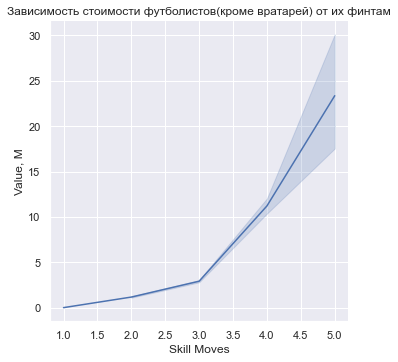

In [184]:
sns.relplot(data=df_without_GK, x=df_without_GK["Skill Moves"], y=df_without_GK["num_value"], kind="line")
plt.title("Зависимость стоимости футболистов(кроме вратарей) от их финтам")
plt.xlabel("Skill Moves")
plt.ylabel("Value, M")
plt.show()



---

За исключением вратарей, чем больше у футболиста значение финтов, тем больше его стоимость. Причем после значения финтов - 3, стоимость футболистов растет быстрее.

---



13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

In [185]:
df["Height"].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [186]:
df["Weight"].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [187]:
df["Age"].head()

0    31
1    33
2    26
3    27
4    27
Name: Age, dtype: int64

In [188]:
df_Height = df
new_list = []
for i in range(df_Height.shape[0]):
    height = 0
    if(str(df_Height.iloc[i]["Height"]) != "nan" and df_Height.iloc[i]["Height"].find("'") != -1):
        n = df_Height.iloc[i]["Height"].find("'")
        height = float(df_Height.iloc[i]["Height"][:n]) * 12 + float(df_Height.iloc[i]["Height"][n + 1:])
    new_list.append(height)
df_Height["num_Height"] = new_list

In [189]:
df_Weight = df
df_Weight["num_Weight"] = [float(i[:-3]) if str(i) != "nan" else 0 for i in df_Weight["Weight"]]

In [190]:
df1 = df.groupby("Position", as_index = False).aggregate({"num_Height" : "mean"})
forwards = ["RF", "LF", "ST", "LW", "RW", "CF", "RS", "LS"]
defenders = ["RWB", "LWB", "LB", "RB", "CB", "RCB", "LCB"]
midfielders = ["CDM", "CAM", "RM", "LM", "CM", "RCM", "LCM", "LDM", "RDM", "LAM", "RAM"]
goalkeeper  = ["GK"]
df_forwards = df_Height[df_Height["Position"].isin(forwards)]
df_defenders = df_Height[df_Height["Position"].isin(defenders)]
df_midfielders = df_Height[df_Height["Position"].isin(midfielders)]
df_goalkeeper = df_Height[df_Height["Position"].isin(goalkeeper)]

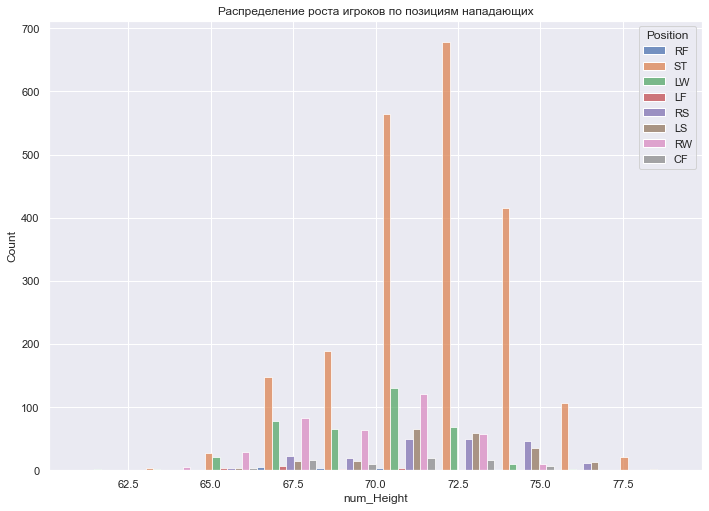

In [191]:
sns.histplot(data=df_forwards, x="num_Height", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение роста игроков по позициям нападающих")
plt.show()

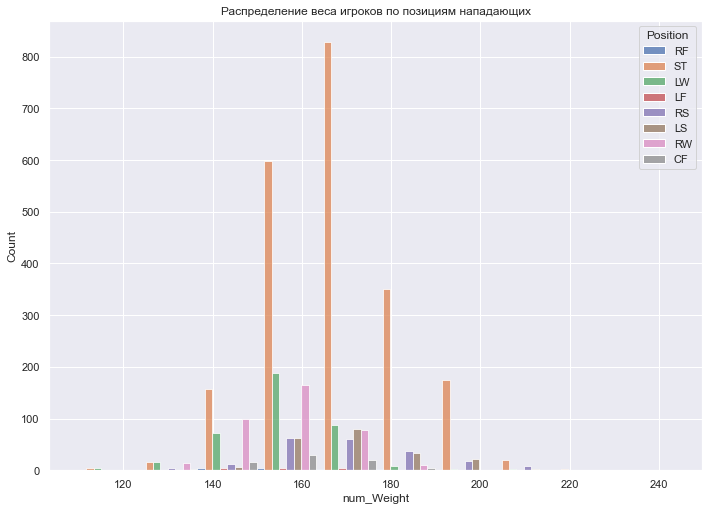

In [192]:
sns.histplot(data=df_forwards, x="num_Weight", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение веса игроков по позициям нападающих")
plt.show()

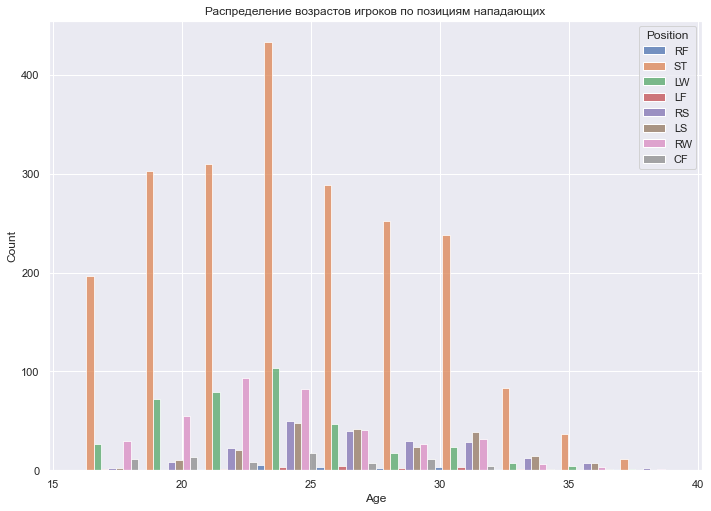

In [193]:
sns.histplot(data=df_forwards, x="Age", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение возрастов игроков по позициям нападающих")
plt.show()



---

Среди нападающих больше всего центральных нападающих, среди них чеще всего встречаются игроки роста 72 дюйма и весом 170 футнов. Самый частовстречающийся рост и вес нападающих игроков на других позициях меньше. Также можно отметить следующую тенденцию: среди каждой позиции нападающих больше распространены игроки в возрасте 23-24 лет.

---



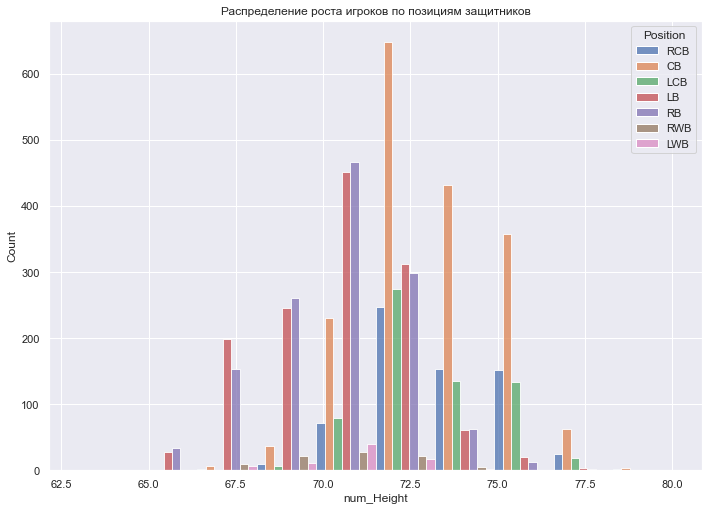

In [194]:
sns.histplot(data=df_defenders, x="num_Height", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение роста игроков по позициям защитников")
plt.show()

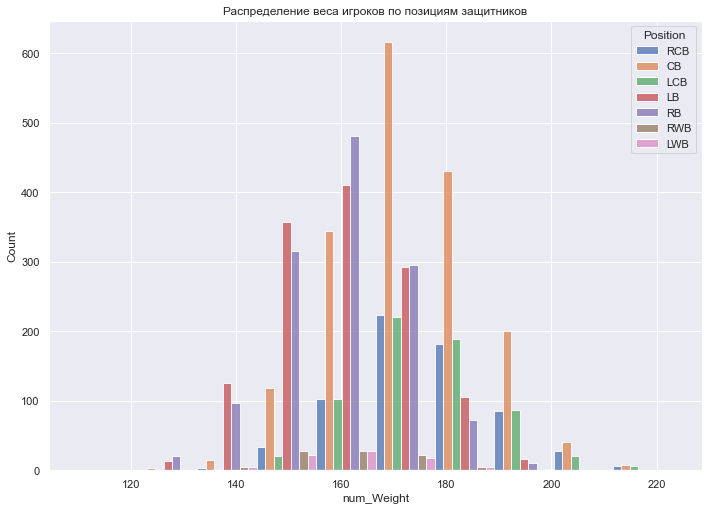

In [195]:
sns.histplot(data=df_defenders, x="num_Weight", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение веса игроков по позициям защитников")
plt.show()

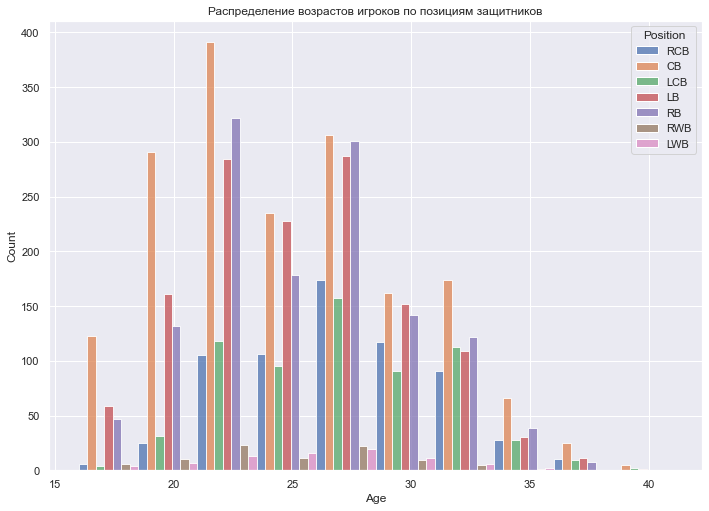

In [196]:
sns.histplot(data=df_defenders, x="Age", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение возрастов игроков по позициям защитников")
plt.show()



---


Среди защитников больше всего центральных защитников, также много правых и левых защитников. Среди защитников самы популярный рост около 70-71 дюймов, вес - 160-179 футнов. Среди центральных и правых зищитников чаще всего встречаются игроки в возрасте 22-23 лет, в то время как среди игроков позиций LCB и LB - 26-27 лет. 


---




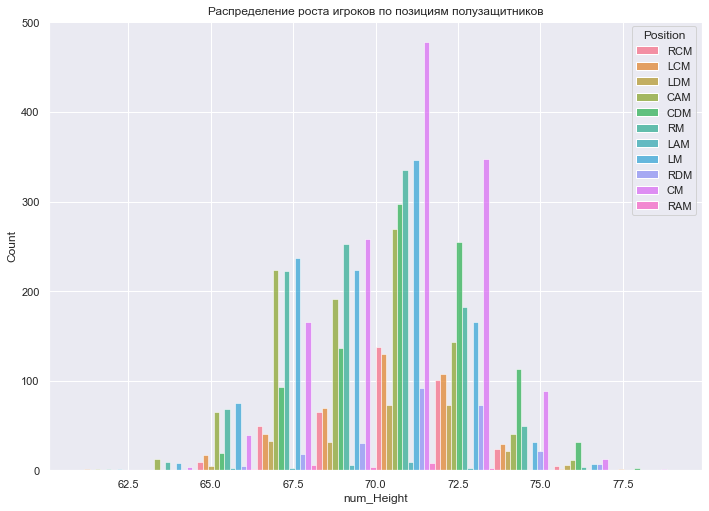

In [197]:
sns.histplot(data=df_midfielders, x="num_Height", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение роста игроков по позициям полузащитников")
plt.show()

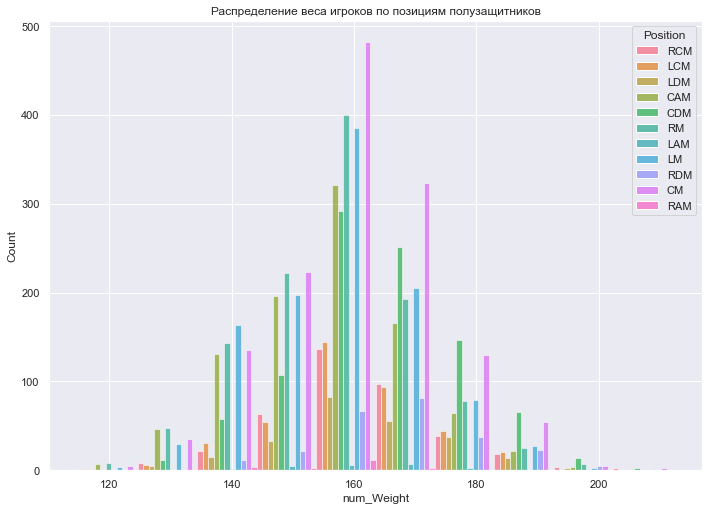

In [198]:
sns.histplot(data=df_midfielders, x="num_Weight", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение веса игроков по позициям полузащитников")
plt.show()

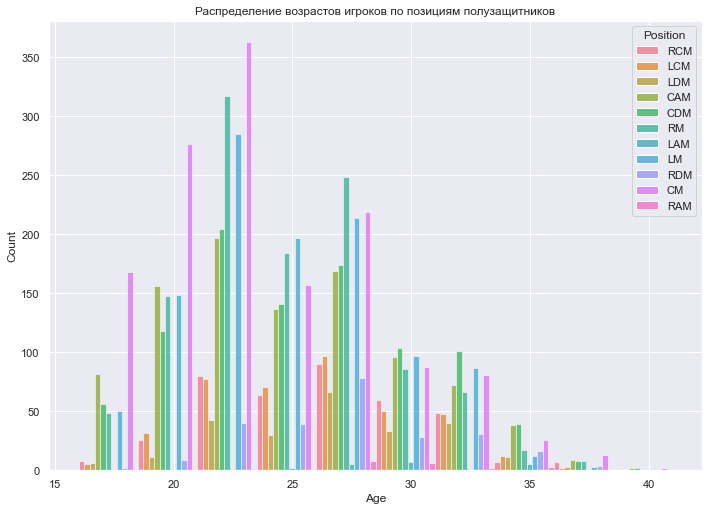

In [199]:
sns.histplot(data=df_midfielders, x="Age", hue="Position", multiple="dodge", bins=10)
plt.title("Распределение возрастов игроков по позициям полузащитников")
plt.show()



---

Среди полузащитников больше всего игроков центральных полузащитников. Среди всех полузащитнивок наблюдаются следующие тенденции: больше всего игроков в возрасте 22-23 лет, с ростом 70-71 дюймов, а весом - 169 фунтов.

---



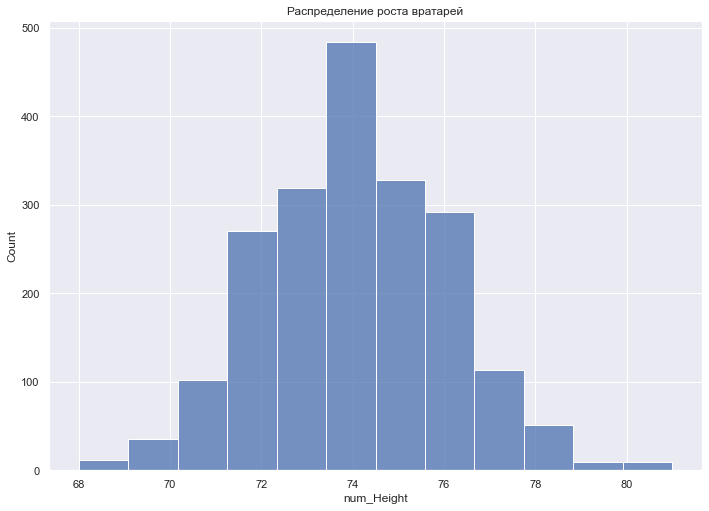

In [200]:
sns.histplot(data=df_goalkeeper, x="num_Height", multiple="dodge", bins=12)
plt.title("Распределение роста вратарей")
plt.show()

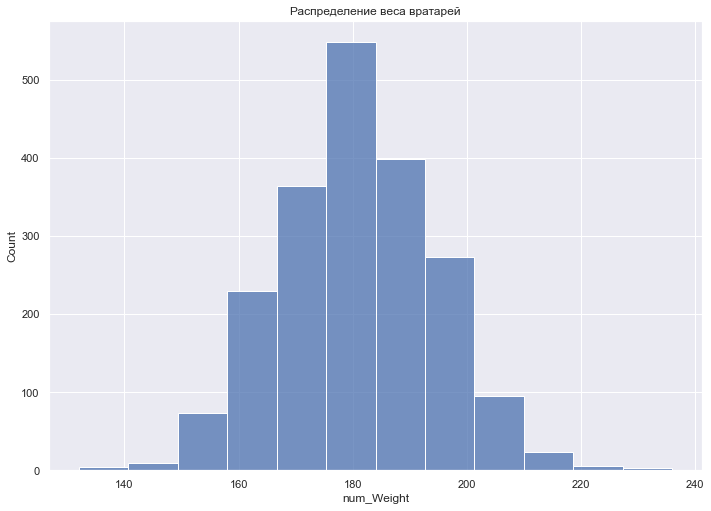

In [201]:
sns.histplot(data=df_goalkeeper, x="num_Weight", multiple="dodge", bins=12)
plt.title("Распределение веса вратарей")
plt.show()

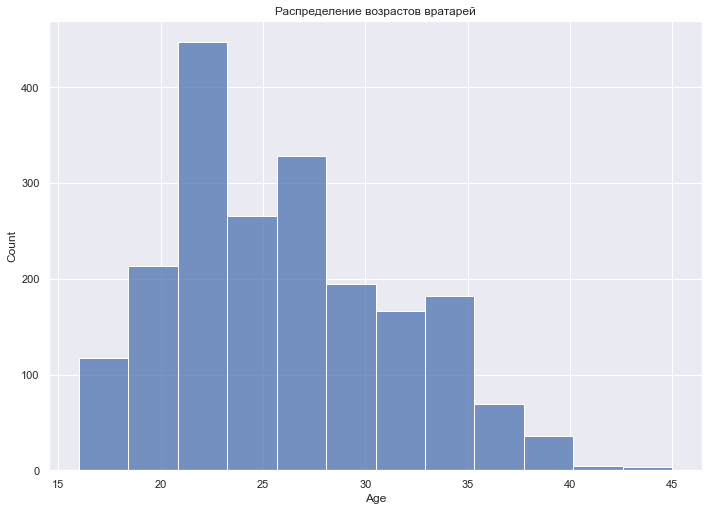

In [202]:
sns.histplot(data=df_goalkeeper, x="Age", multiple="dodge", bins=12)
plt.title("Распределение возрастов вратарей")
plt.show()



---

Среди вратарей больше всего футболистов в возрасте 22-23 лет, с весом - 180 фунтов, ростом - 74 дюйма.

---



14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

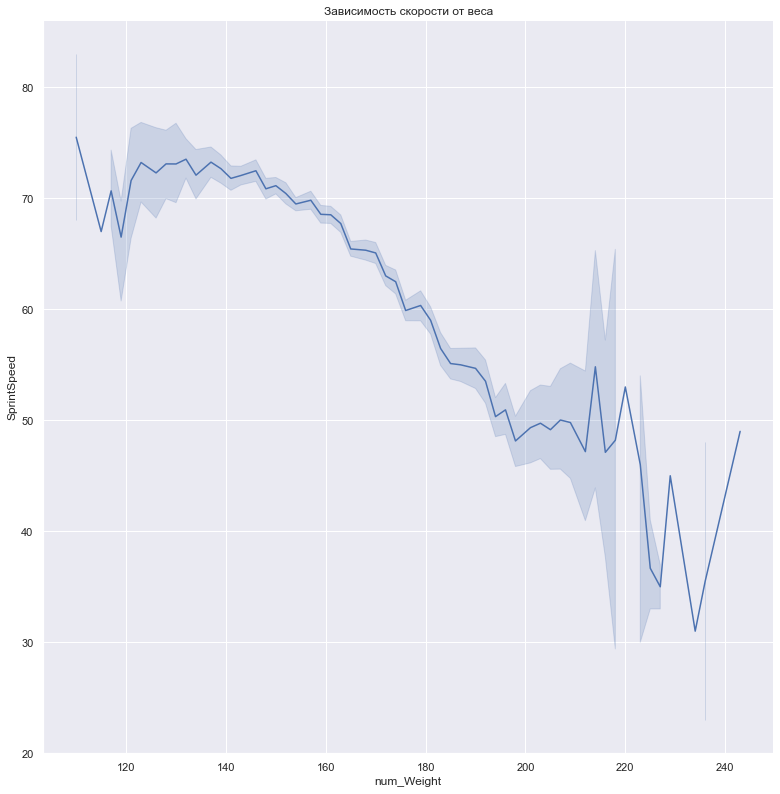

In [203]:
df_Weight = df_Weight.sort_values("num_Weight")
sns.relplot(data=df_Weight, x="num_Weight", y="SprintSpeed", kind="line", height = 11)
plt.title("Зависимость скорости от веса")
plt.show()

In [204]:
df_Weight["num_Weight"].corr(df_Weight["SprintSpeed"])

-0.41093630221159877

In [205]:
df_Weight[df_Weight["num_Weight"] > 200].shape[0]

369



---

Корреляция между весом и скоросью составляет -0.4, то есть наблюдается слабая обратная зависимость мжеду весом и скоростью. Центральная часть графика это демонстрирует. Исключение составляют игроки с весов больше 200 фунтов(таких лишь 369 человек), что сотавляет незначительную часть из представленного датасета.

---




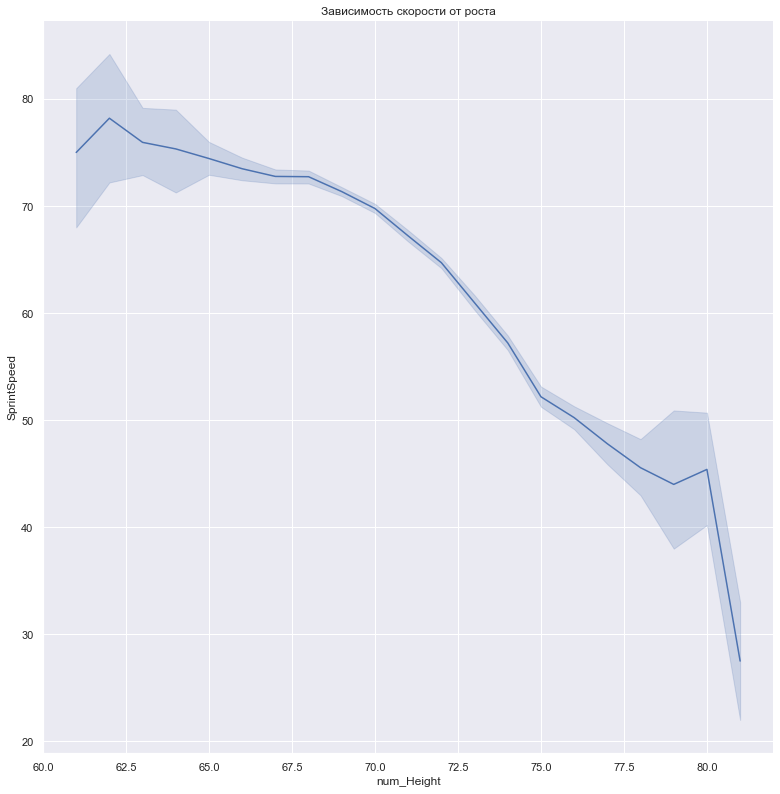

In [206]:
df_Height = df_Height.sort_values("num_Height")
sns.relplot(data=df_Weight, x="num_Height", y="SprintSpeed", kind="line", height = 11)
plt.title("Зависимость скорости от роста")
plt.show()

In [207]:
df_Height["num_Height"].corr(df_Height["SprintSpeed"])

-0.46560007767043055



---

Корреляция между ростов и скоросью составляет -0,4. То есть наблюдается слабая обратная зависимость, что демонстрирует график. 

---



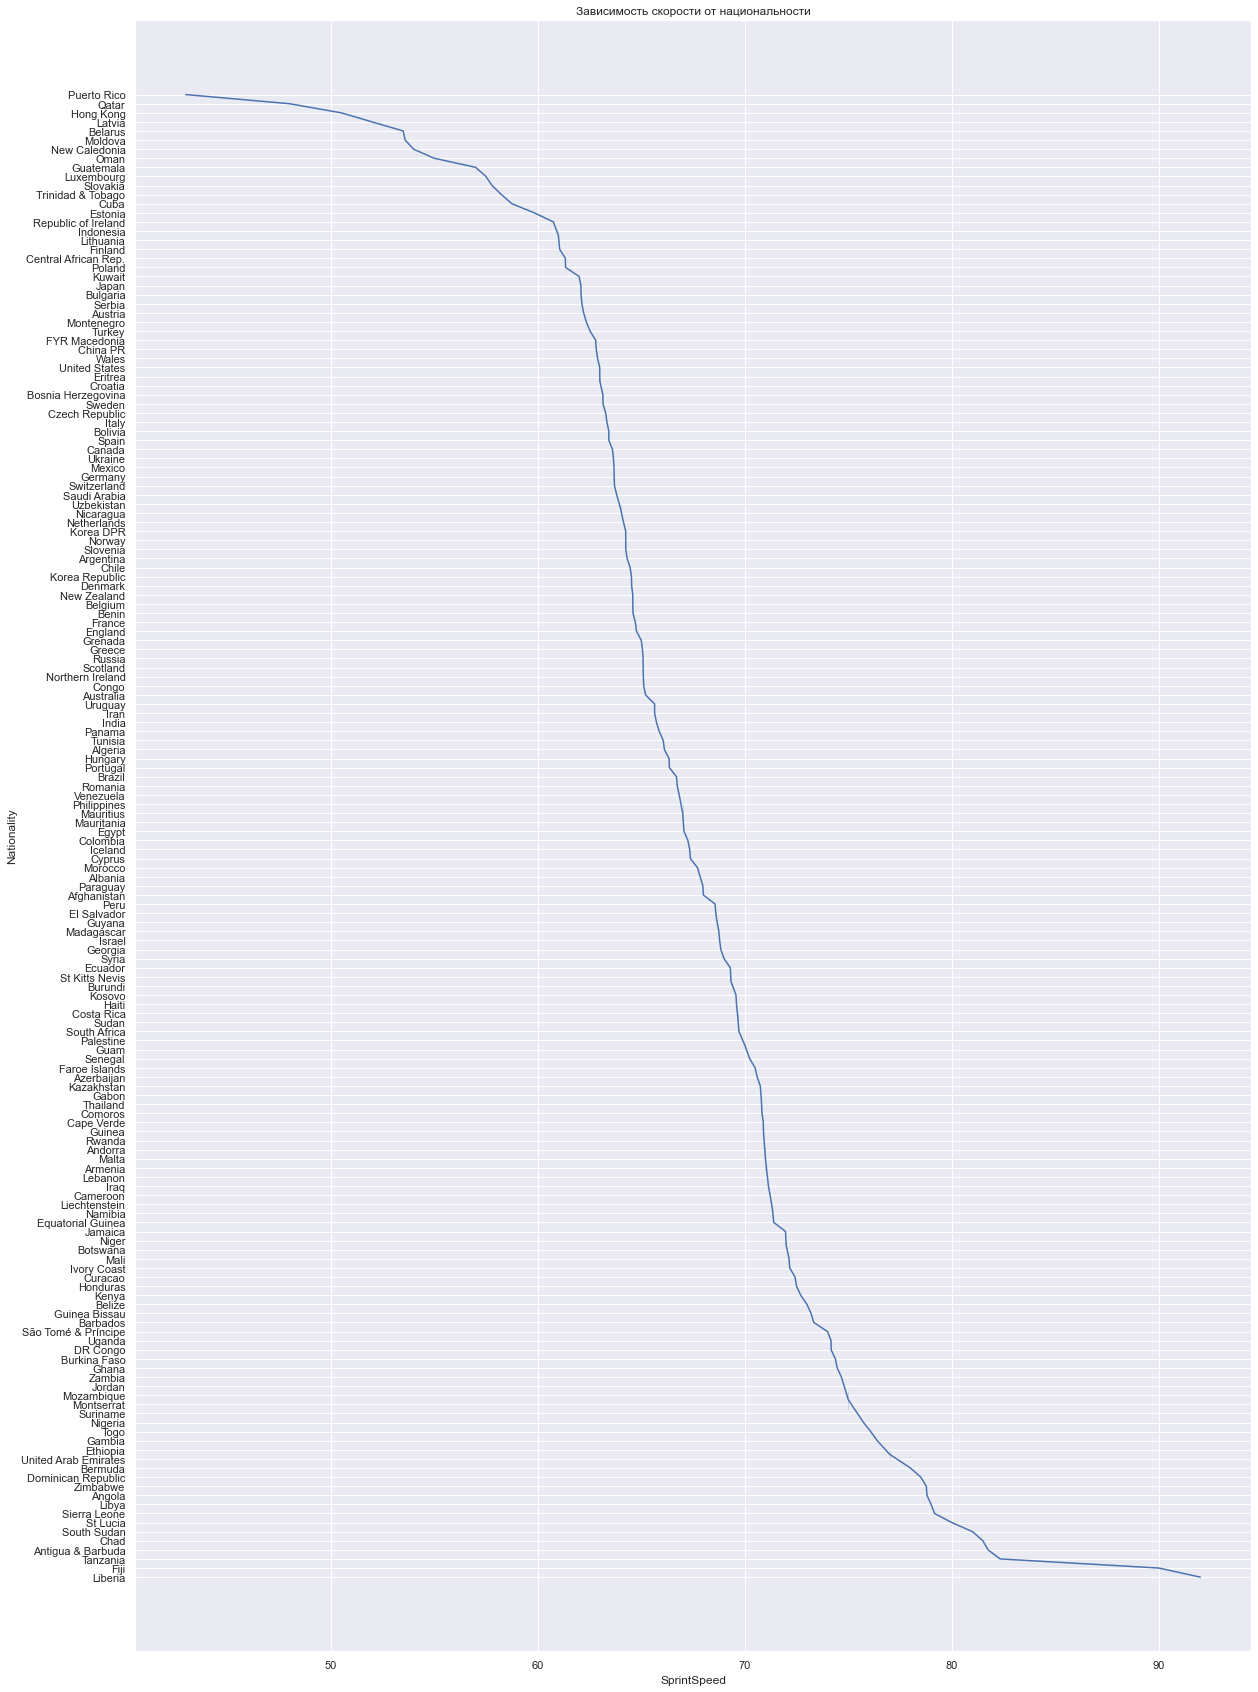

In [208]:
df_Nat = df.groupby("Nationality", as_index=False).aggregate({"SprintSpeed" : "mean"})
df_Nat = df_Nat.sort_values("SprintSpeed")
sns.set(rc={'figure.figsize':(20, 30)})
fig = sns.lineplot(data=df_Nat, x="SprintSpeed", y="Nationality")
plt.title("Зависимость скорости от национальности")
plt.show()



---


График демонстрирует наличие зависимости между национальностью и скоростью. Самой высокой скоросью отличаются футболисты из Фиджи и многих стран Африки.


---



15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

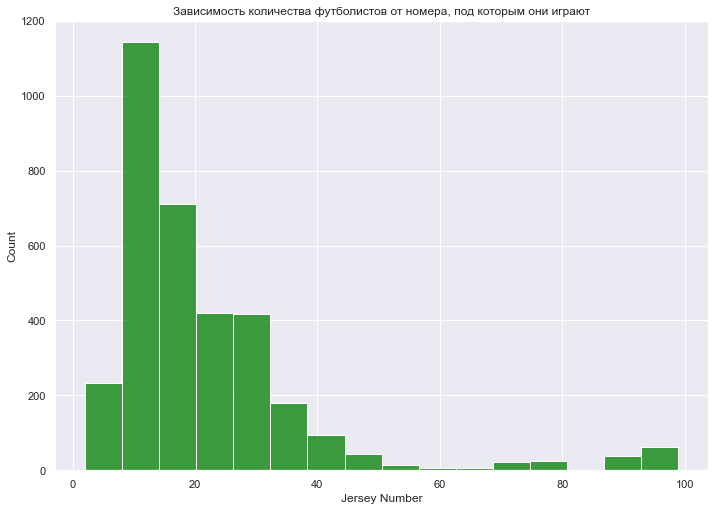

In [209]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df_forwards, x="Jersey Number", bins=16, color = "green")
plt.title("Зависимость количества футболистов от номера, под которым они играют")
plt.show()

In [210]:
df_forwards["Jersey Number"].value_counts().head(10)

9.0     488
11.0    259
19.0    199
10.0    183
7.0     164
17.0    136
20.0    133
18.0    124
14.0    123
27.0    103
Name: Jersey Number, dtype: int64



---

Гистограмма показывает что чаще всего встречаются номера до 30. Самый популярные номера 9(488 наблюдений), 11(259 наблюдений), 19(199 наблюдений), 10(183 наблюдения)

---



16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


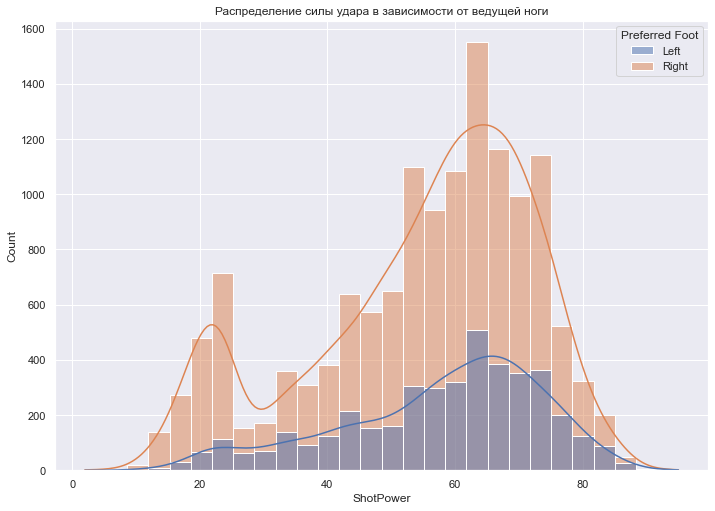

In [211]:
sns.histplot(data = df, x = df["ShotPower"], kde=True, hue="Preferred Foot",  bins=28, legend=True)
plt.title("Распределение силы удара в зависимости от ведущей ноги")
plt.xlabel("ShotPower")
plt.ylabel("Count")
plt.show()



---

Зависимости силы удара от ведущей ноги нет, так как гистограмма по силе удара в зависимости от ведущей ноги показала равное распределение, если учесть, что левшей примерно в 3 раза меньше чем правшей.

---



In [212]:
df.Aggression.head()

0    48.0
1    63.0
2    56.0
3    38.0
4    76.0
Name: Aggression, dtype: float64

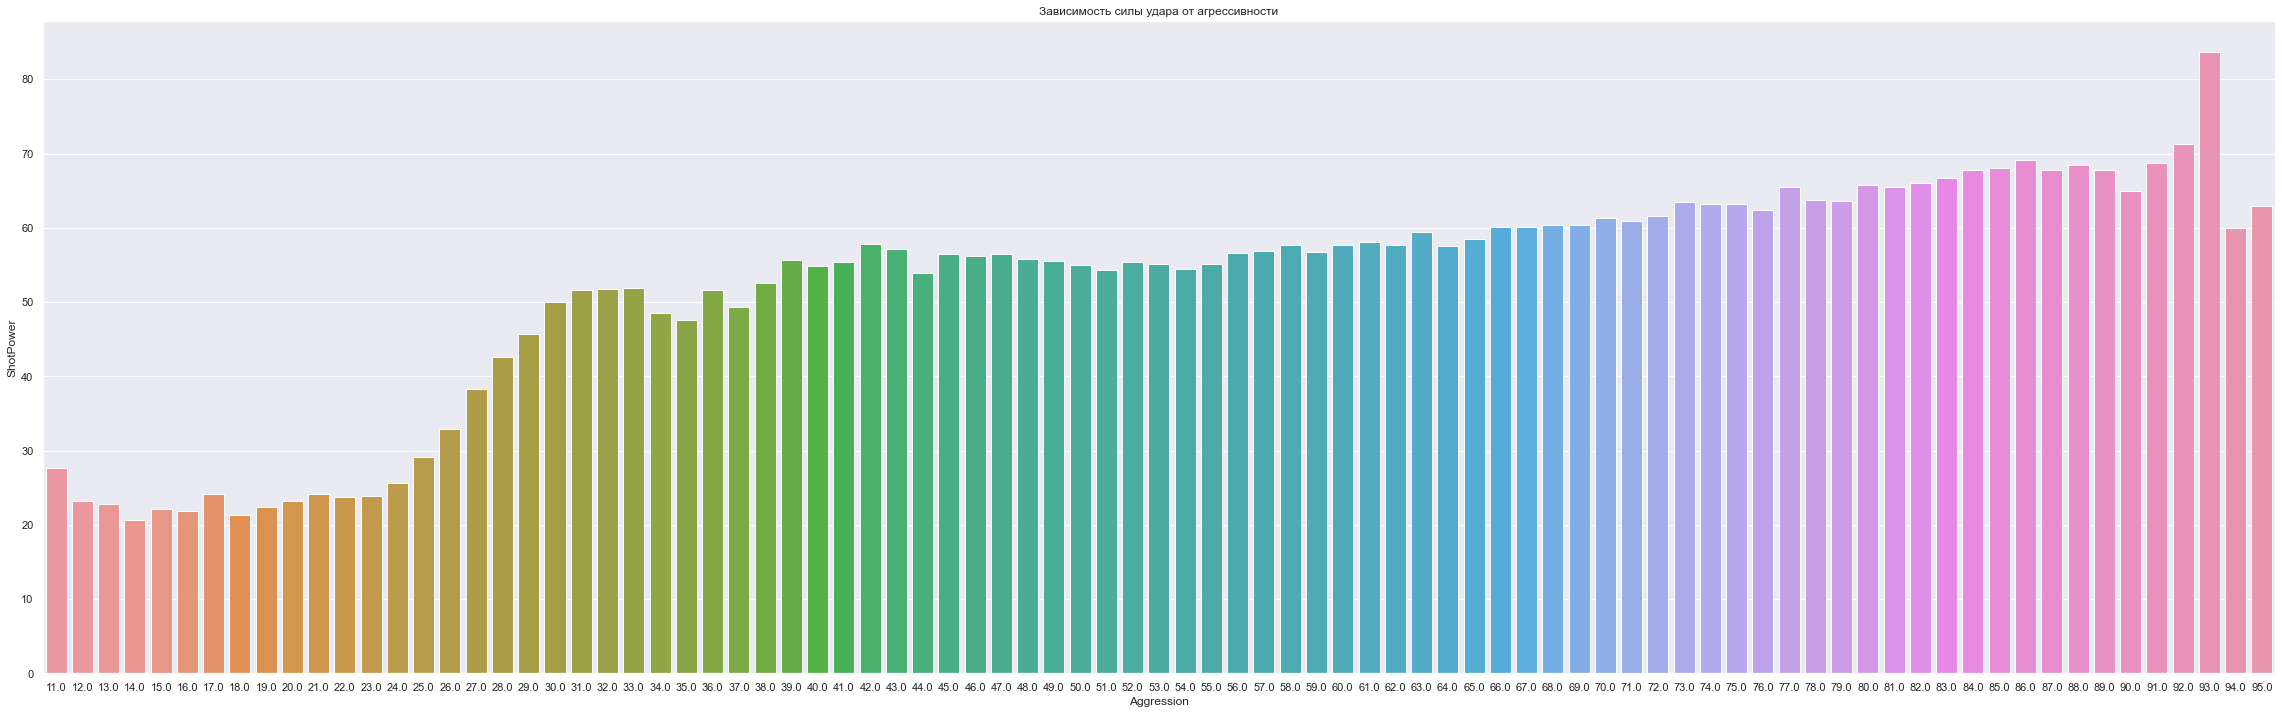

In [213]:
sns.set(rc={'figure.figsize':(40,12)})
df_Aggression = df.groupby("Aggression", as_index=False).aggregate({"ShotPower" : "mean"})
sns.barplot(data=df_Aggression, x="Aggression", y="ShotPower")
plt.title("Зависимость силы удара от агрессивности")
plt.show()

In [214]:
df["Aggression"].corr(df["ShotPower"])

0.4913858863954407




---
Рассчитанная корреляция и построенная столбачатая диаграмма показывают, что есть средняя прямая зависимость между силой ударой и агрессией.

---



17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

,Club,num_value
470,Real Madrid,874.425
212,FC Barcelona,852.600
374,Manchester City,786.555
326,Juventus,704.475
214,FC Bayern München,679.025
61,Atlético Madrid,644.525
435,Paris Saint-Germain,625.325
583,Tottenham Hotspur,618.450
134,Chelsea,606.815
375,Manchester United,588.850


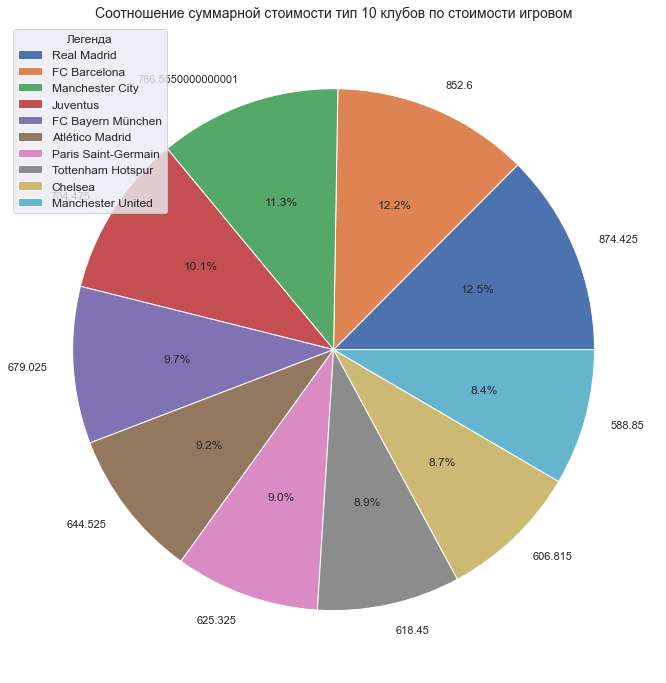

In [215]:
df_Aggression = df_Value.groupby("Club", as_index=False).aggregate({"num_value" : "sum"}).sort_values("num_value", ascending=False)
df_Aggression_10 = df_Aggression[:10]
display(df_Aggression_10)
plt.pie(
    df_Aggression_10["num_value"],
    labels = df_Aggression_10["num_value"], 
    autopct='%.1f%%',
    );
plt.title("Соотношение суммарной стоимости тип 10 клубов по стоимости игровом", fontdict = {'fontsize' : 14})
plt.legend(df_Aggression_10["Club"], 
           loc='best', 
           fontsize = 12,
           title = "Легенда"
          )
plt.show()



---

Значения суммарной стоимости игроков в топ 10 клубах и соотношение суммарной стоимости в них отражены на графике. Видно, что суммарная стоимость игроков в Real Madrid составляет 874 млн. евро(12.5% от общей суммы топ 10 клубов) - это самая большая доля. За ним в топе следует FC Barcelona с небольшим отставанием.

---



19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

In [216]:
df["Contract Valid Until"][20:31]

20            2023
21            2020
22            2021
23            2021
24            2020
25            2022
26            2023
27            2021
28    Jun 30, 2019
29            2022
30            2022
Name: Contract Valid Until, dtype: object

В вспомогательном датафрейме перекодируем переменную Contract Valid Until типа object во flaot. И построем график отражающий стоимость игрока в зависимости от года окончания контракта. Так как в датасете нет данных, когда он был заключен. 0 заменим значения nan, так как у некоторых футболистов нет некущего 

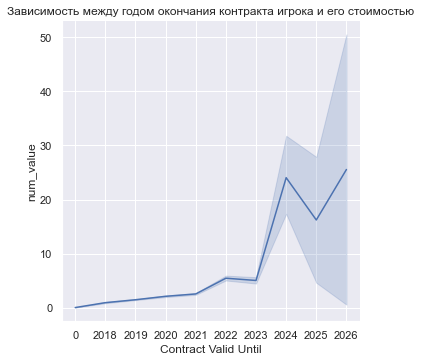

In [217]:
df_Contract = df_Value
df_Contract["Contract Valid Until"] = [str(i)[-4:] if str(i) != "nan" else str(0) for i in df_Contract["Contract Valid Until"]]
df_Contract = df_Contract.sort_values("Contract Valid Until")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(data=df_Contract, x="Contract Valid Until", y="num_value", kind="line")
plt.title("Зависимость между годом окончания контракта игрока и его стоимостью")
plt.show()



---

Зависимости между годом окончания контракта и стоимостью игрока нет. 

Однозначно ответить на вопрос о том, есть ли зависимость между продолжительностью контракта и стоимость игрока, нельзя, так как недостаточно данных.

---



20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

In [218]:
df_Contract_count = df_Contract["Contract Valid Until"].value_counts()
df_Contract_count

2019    5920
2021    4360
2020    4044
2022    1477
2023    1053
2018    1032
0        289
2024      23
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

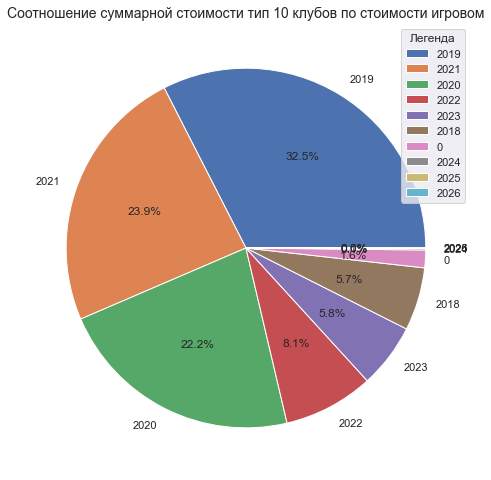

In [219]:
plt.pie(
    df_Contract_count,
    labels = df_Contract_count.index, 
    autopct='%.1f%%',
    );
plt.title("Соотношение суммарной стоимости тип 10 клубов по стоимости игровом", fontdict = {'fontsize' : 14})
plt.legend(df_Contract_count.index, 
           loc='best', 
           fontsize = 11,
           title = "Легенда"
          )
plt.show()



---

Больше всего контрактов закончилось в 2019 году. Это отчетличво видно на круговой диаграмме. В датасете есть информация о том, что в 2023 году закончится контракт у 23 игроков, в 2025 и 2026 - 7 и 2 соответственно.

---



21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

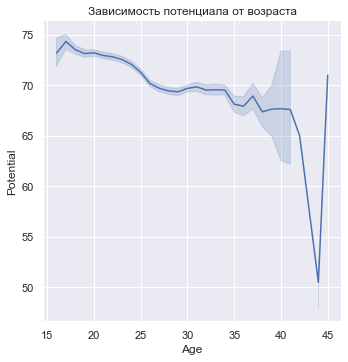

In [220]:
sns.relplot(data=df, x="Age", y="Potential", kind="line")
plt.title("Зависимость потенциала от возраста")
plt.show()

In [221]:
df1 = df.groupby("Age", as_index=False).aggregate({"Potential" : "mean"})
df1[["Age", "Potential"]].corr()

,Age,Potential
Age,1.000000,-0.703127
Potential,-0.703127,1.000000


Корреляции нет, но на графике видно, что на это могут влиять футболисты старше 40 лет, так как чаще всего это футболисты из маленьких клубов или вратари. Посчитаем их количество, если их мало то расчитаем корреляцию без учета этих игроков.



---

Корреляция между возрастов и потенциалом составила -0.7, значит есть сильная обратная зависимость между возрастов и потенциалом

---



23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

In [222]:
df["Overall"].head()

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64

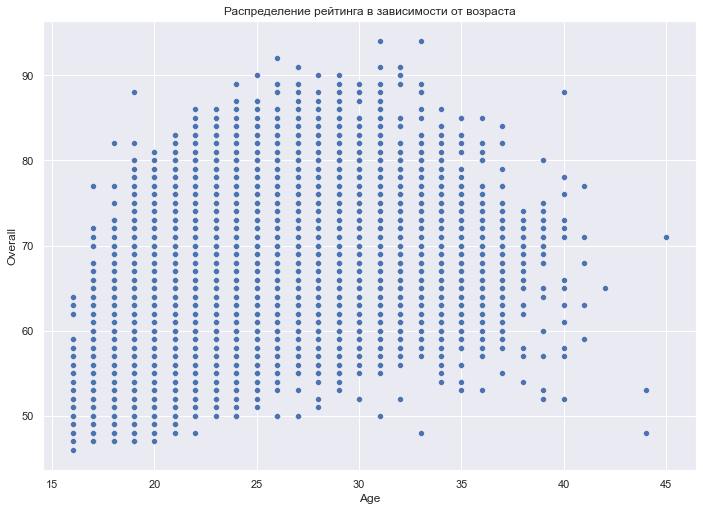

In [223]:
sns.scatterplot(data=df, x="Age", y="Overall")
plt.title("Распределение рейтинга в зависимости от возраста")
plt.show()



---

У футболистов в возрасте 25-30 лет рейтинг выше, чем у младших и старших игроков.

---



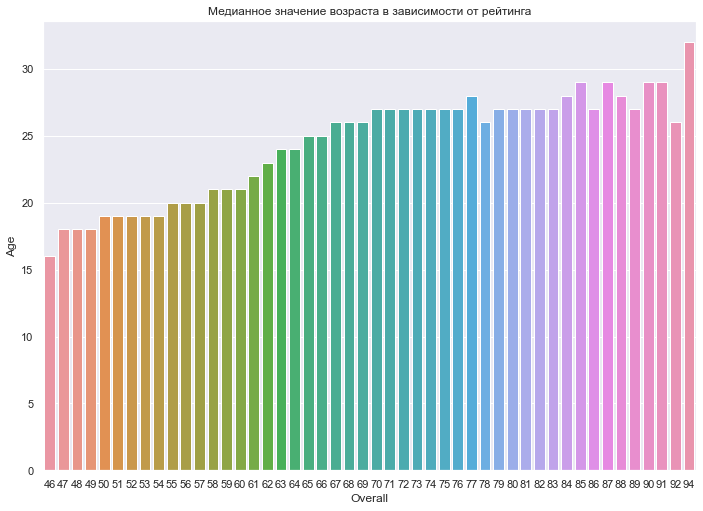

In [224]:
df_Overall = df.groupby("Overall", as_index=False).aggregate({"Age" : "median"})
sns.barplot(data=df_Overall, x="Overall", y="Age")
plt.title("Медианное значение возраста в зависимости от рейтинга")
plt.show()



---

Пик карьеры футболистов приходится примерно на 32 года.

---



,Age,Count
0,26,1
1,27,3
2,31,2
3,32,2
4,33,1


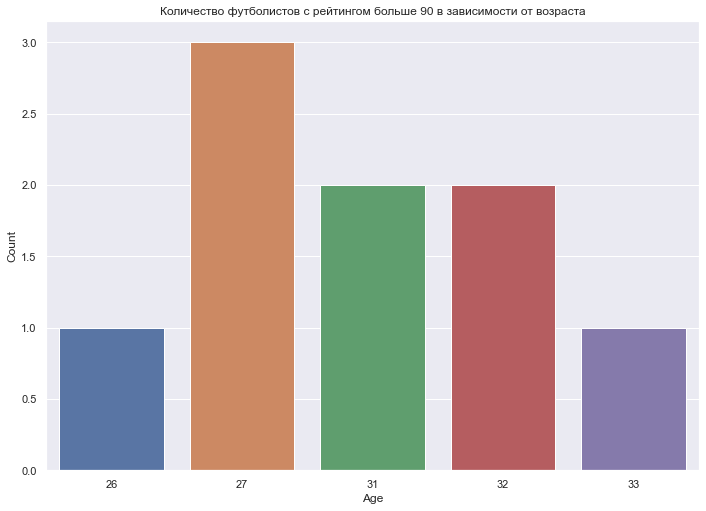

In [225]:
df_Overall_90 = df[df["Overall"] > 90].groupby("Age", as_index=False).aggregate({"Overall" : "count"}).rename(columns={"Overall" : "Count"})
display(df_Overall_90)
sns.barplot(data=df_Overall_90, x="Age", y="Count")
plt.title("Количество футболистов с рейтингом больше 90 в зависимости от возраста")
plt.show()



---

На диаграмме видно, что среди футболистов с рейтингов 90+ больше всего игроков в возрасте 27 лет.

---



26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

In [226]:
df_Wage = df
new_list = []
for i in range(len(df_Value)):
    if(df_Wage.iloc[i]["Wage"][-1] == "M"):
        new_list.append(df_Wage.iloc[i]["Wage"][1:-1])
    elif(df_Wage.iloc[i]["Wage"][-1] == "K"):
        new_list.append(float(df_Wage.iloc[i]["Wage"][1:-1]) / 1000.0)
    else:
        new_list.append(0)
df_Wage["num_wage"] = new_list
df_Wage = df_Wage.astype({'num_value': np.float})
df_Overall_80= df_Wage[(df["Overall"] >= 80) & (df["Overall"] <= 90)]
df_Overall_90= df_Wage[df["Overall"] > 90]
av_wage_80 = df_Overall_80["num_wage"].mean()
av_wage_90 = df_Overall_90["num_wage"].mean()
av_wage_90 - av_wage_80

0.301973137973138

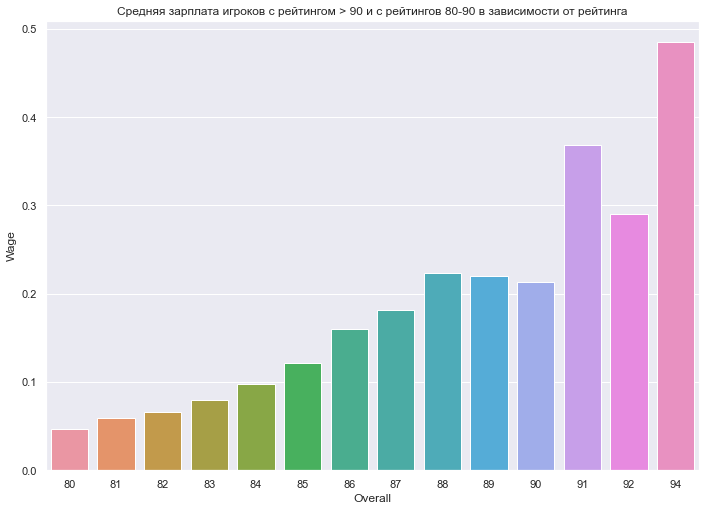

In [227]:
df_Wage1 = df_Wage[df_Wage["Overall"] >= 80] 
df_Wage1 = df_Wage1.groupby("Overall", as_index=False).aggregate({"num_wage" : "mean"})
sns.barplot(data = df_Wage1, x = df_Wage1["Overall"], y=df_Wage1["num_wage"])
plt.title("Средняя зарплата игроков с рейтингом > 90 и с рейтингов 80-90 в зависимости от рейтинга")
plt.xlabel("Overall")
plt.ylabel("Wage")
plt.show()



---

Средняя зарплата игроков с рейтингов 90+ больше средней зарплаты футболистов с рейтингов 80-90 примерно на 302 тыс. евро. 
На столбчатой диаграмме представленны средние значения зарплаты в зависимости от рейтинга. Наблюдается тенденция линейного увеличения зарплаты при рейтинге 80-88, выше этих значений видны явние пики при рейтинге 91 и 94 

---



